In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
data = pd.read_csv("./cleaned_pipeline_accidents.csv")
data.head()

,Unnamed: 0,report_number,iyear,local_datetime,operator_id,name,on_off_shore,onshore_state_abbreviation,onshore_city_name,onshore_county_name,location_latitude,location_longitude,location_type,incident_area_type,incident_area_subtype,system_part_involved,could_be_hca,commodity_reached_hca,cause,cause_details,commodity_released_type,unintentional_release_bbls,recovered_bbls,installation_year,material_involved,release_type,ignite_ind,explode_ind,shutdown_due_accident_ind,shutdown_datetime,restart_datetime,num_pub_evacuated,injury_ind,injure,fatality_ind,fatal,wildlife_impact_ind,soil_contamination,long_term_assessment,remediation_ind,water_contam_ind,est_cost_oper_paid,est_cost_gas_released,est_cost_prop_damage,est_cost_emergency,est_cost_environmental,est_cost_other,incident_identified_datetime,on_site_datetime,shutdown_date,restart_date,occurence_date,ident_mins
0,0,20230109,2023,2023-04-26 16:30:00,15786,Portland pipe line corporation,Onshore,Nh,Shelburne,Coos,44.397670,-71.117660,Contained onsite,Underground,Under soil,Pump/meter station,No,No,Corrosion failure,Internal corrosion,Crude oil,110.0,75.0,1968,Carbon steel,Leak,Yes,NaN,No,NaN,NaN,0.0,Yes,3,No,0,Yes,Yes,No,Yes,Yes,0.0,7500.0,100000.0,1700000.0,100000.0,0.0,2023-04-26 17:12:00,2023-04-26 18:30:00,NaN,NaN,2023-04-26,42.0
1,1,20210306,2021,2021-09-28 12:30:00,2731,Chevron pipe line co,Offshore,NaN,NaN,NaN,29.089005,-90.199339,Unknown,NaN,NaN,Pipeline (riser/bend),Yes,No,Other outside force damage,"damage by boats, barges, drilling rigs, or oth...",Crude oil,10367.0,0.0,1976,Carbon steel,Leak,Yes,NaN,NaN,NaN,NaN,0.0,Yes,4,No,0,Yes,No,No,No,Yes,0.0,759000.0,0.0,1797511.0,36139.0,0.0,2021-09-28 12:30:00,2021-09-28 16:30:00,NaN,NaN,2021-09-28,0.0
2,2,20210137,2021,2021-04-03 09:30:00,18718,Sunoco pipeline,Onshore,Tx,Ballinger,Runnels,31.769480,-99.886180,Pipeline row,Underground,Under soil,Pipeline (valve site),Yes,No,Material failure of pipe or weld,"design-, construction-, installation-, or fabr...",Crude oil,1000.0,1000.0,Unknown,Carbon steel,Leak,Yes,No,No,NaN,NaN,0.0,Yes,5,Yes,4,Yes,Yes,No,Yes,No,500000.0,62000.0,100000.0,56000.0,1400000.0,0.0,2021-04-03 10:30:00,2021-04-03 10:30:00,NaN,NaN,2021-04-03,60.0
3,3,20200166,2020,2020-05-07 11:33:00,32334,Tc oil pipeline operations,Onshore,Tx,Beaumont,Jefferson,29.991468,-94.080399,Migrated offsite,Aboveground,Typical aboveground facility piping or appurte...,Terminal/tank farm,Yes,Yes,Corrosion failure,Internal corrosion,Crude oil,442.0,442.0,2014,Carbon steel,Leak,Yes,NaN,NaN,NaN,NaN,0.0,Yes,3,Yes,1,No,Yes,No,Yes,Yes,0.0,1459.0,220782.0,989456.0,2424681.0,0.0,2020-05-07 11:33:00,2020-05-07 11:33:00,NaN,NaN,2020-05-07,0.0
4,4,20190007,2018,2018-12-13 23:41:00,18092,Sfpp,Onshore,Nm,Anthony,Dona ana,32.061560,-106.649450,Pipeline row,Transition area,Other,Pipeline (valve site),Yes,Yes,Corrosion failure,External corrosion,Refined liquid,10910.0,6779.0,1964,Carbon steel,Rupture,Yes,Yes,Yes,12/13/2018 23:41,12/20/2018 17:03,8.0,Yes,3,Yes,2,No,Yes,Yes,Yes,Yes,373900.0,761460.0,436000.0,1570000.0,16900000.0,0.0,2018-12-14 00:51:00,2018-12-14 02:05:00,2018-12-13 23:41:00,2018-12-20 17:03:00,2018-12-13,70.0


In [7]:
data = data.drop(columns=["Unnamed: 0", "iyear","operator_id","name","onshore_city_name","onshore_county_name",
                   "location_latitude","location_longitude","installation_year",
                   "injure","fatal","shutdown_date","occurence_date","ident_mins"]).set_index("report_number")

In [8]:
data.head()

,local_datetime,on_off_shore,onshore_state_abbreviation,location_type,incident_area_type,incident_area_subtype,system_part_involved,could_be_hca,commodity_reached_hca,cause,cause_details,commodity_released_type,unintentional_release_bbls,recovered_bbls,material_involved,release_type,ignite_ind,explode_ind,shutdown_due_accident_ind,shutdown_datetime,restart_datetime,num_pub_evacuated,injury_ind,fatality_ind,wildlife_impact_ind,soil_contamination,long_term_assessment,remediation_ind,water_contam_ind,est_cost_oper_paid,est_cost_gas_released,est_cost_prop_damage,est_cost_emergency,est_cost_environmental,est_cost_other,incident_identified_datetime,on_site_datetime,restart_date
report_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20230109,2023-04-26 16:30:00,Onshore,Nh,Contained onsite,Underground,Under soil,Pump/meter station,No,No,Corrosion failure,Internal corrosion,Crude oil,110.0,75.0,Carbon steel,Leak,Yes,NaN,No,NaN,NaN,0.0,Yes,No,Yes,Yes,No,Yes,Yes,0.0,7500.0,100000.0,1700000.0,100000.0,0.0,2023-04-26 17:12:00,2023-04-26 18:30:00,NaN
20210306,2021-09-28 12:30:00,Offshore,NaN,Unknown,NaN,NaN,Pipeline (riser/bend),Yes,No,Other outside force damage,"damage by boats, barges, drilling rigs, or oth...",Crude oil,10367.0,0.0,Carbon steel,Leak,Yes,NaN,NaN,NaN,NaN,0.0,Yes,No,Yes,No,No,No,Yes,0.0,759000.0,0.0,1797511.0,36139.0,0.0,2021-09-28 12:30:00,2021-09-28 16:30:00,NaN
20210137,2021-04-03 09:30:00,Onshore,Tx,Pipeline row,Underground,Under soil,Pipeline (valve site),Yes,No,Material failure of pipe or weld,"design-, construction-, installation-, or fabr...",Crude oil,1000.0,1000.0,Carbon steel,Leak,Yes,No,No,NaN,NaN,0.0,Yes,Yes,Yes,Yes,No,Yes,No,500000.0,62000.0,100000.0,56000.0,1400000.0,0.0,2021-04-03 10:30:00,2021-04-03 10:30:00,NaN
20200166,2020-05-07 11:33:00,Onshore,Tx,Migrated offsite,Aboveground,Typical aboveground facility piping or appurte...,Terminal/tank farm,Yes,Yes,Corrosion failure,Internal corrosion,Crude oil,442.0,442.0,Carbon steel,Leak,Yes,NaN,NaN,NaN,NaN,0.0,Yes,Yes,No,Yes,No,Yes,Yes,0.0,1459.0,220782.0,989456.0,2424681.0,0.0,2020-05-07 11:33:00,2020-05-07 11:33:00,NaN
20190007,2018-12-13 23:41:00,Onshore,Nm,Pipeline row,Transition area,Other,Pipeline (valve site),Yes,Yes,Corrosion failure,External corrosion,Refined liquid,10910.0,6779.0,Carbon steel,Rupture,Yes,Yes,Yes,12/13/2018 23:41,12/20/2018 17:03,8.0,Yes,Yes,No,Yes,Yes,Yes,Yes,373900.0,761460.0,436000.0,1570000.0,16900000.0,0.0,2018-12-14 00:51:00,2018-12-14 02:05:00,2018-12-20 17:03:00


## **Model for recovery success**

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler, FunctionTransformer, MinMaxScaler, PowerTransformer

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, root_mean_squared_error

from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import BayesianRidge, LinearRegression, RidgeCV
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.base import BaseEstimator, TransformerMixin

import pickle

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4553 entries, 20230109 to 20100016
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   local_datetime                4553 non-null   object 
 1   on_off_shore                  4553 non-null   object 
 2   onshore_state_abbreviation    4543 non-null   object 
 3   location_type                 4553 non-null   object 
 4   incident_area_type            4543 non-null   object 
 5   incident_area_subtype         3407 non-null   object 
 6   system_part_involved          4553 non-null   object 
 7   could_be_hca                  4553 non-null   object 
 8   commodity_reached_hca         4552 non-null   object 
 9   cause                         4553 non-null   object 
 10  cause_details                 4553 non-null   object 
 11  commodity_released_type       4553 non-null   object 
 12  unintentional_release_bbls    4553 non-null   float64
 1

### **Calculating recovery rate (Target)**

In [11]:
data = data[data['unintentional_release_bbls'] > 0]
data['recovery'] = (data['recovered_bbls'] / data['unintentional_release_bbls'])

#### **Dropping some columns**

In [12]:
data = data.drop(columns=['incident_identified_datetime', 'restart_date', 
                          'est_cost_oper_paid', 'est_cost_gas_released', 'est_cost_prop_damage', 'est_cost_emergency',	
                          'est_cost_environmental', 'est_cost_other','num_pub_evacuated','recovered_bbls','on_off_shore', 
                          'incident_area_subtype', 'commodity_reached_hca', 'injury_ind', 'fatality_ind', 'shutdown_due_accident_ind',
                          'cause_details','material_involved','water_contam_ind','wildlife_impact_ind', 'explode_ind'])

data.dropna(subset=['onshore_state_abbreviation'], inplace=True)

In [13]:
data.head()

,local_datetime,onshore_state_abbreviation,location_type,incident_area_type,system_part_involved,could_be_hca,cause,commodity_released_type,unintentional_release_bbls,release_type,ignite_ind,shutdown_datetime,restart_datetime,soil_contamination,long_term_assessment,remediation_ind,on_site_datetime,recovery
report_number,,,,,,,,,,,,,,,,,,
20230109,2023-04-26 16:30:00,Nh,Contained onsite,Underground,Pump/meter station,No,Corrosion failure,Crude oil,110.0,Leak,Yes,NaN,NaN,Yes,No,Yes,2023-04-26 18:30:00,0.681818
20210137,2021-04-03 09:30:00,Tx,Pipeline row,Underground,Pipeline (valve site),Yes,Material failure of pipe or weld,Crude oil,1000.0,Leak,Yes,NaN,NaN,Yes,No,Yes,2021-04-03 10:30:00,1.000000
20200166,2020-05-07 11:33:00,Tx,Migrated offsite,Aboveground,Terminal/tank farm,Yes,Corrosion failure,Crude oil,442.0,Leak,Yes,NaN,NaN,Yes,No,Yes,2020-05-07 11:33:00,1.000000
20190007,2018-12-13 23:41:00,Nm,Pipeline row,Transition area,Pipeline (valve site),Yes,Corrosion failure,Refined liquid,10910.0,Rupture,Yes,12/13/2018 23:41,12/20/2018 17:03,Yes,Yes,Yes,2018-12-14 02:05:00,0.621357
20180111,2018-03-20 18:21:00,In,Pipeline row,Underground,Pipeline (valve site),Yes,Natural force damage,Refined liquid,1400.0,Rupture,Yes,3/20/2018 18:27,4/7/18 13:10,No,No,No,2018-03-20 20:52:00,0.860714


In [14]:
data['location_type']  = data['location_type'].replace({'Unknown':np.nan})

In [15]:
# data['unintentional_release_bbls'] = np.log(data['unintentional_release_bbls'])
# # (np.log(data['unintentional_release_bbls'])).plot(kind='hist')

In [16]:
X = data.copy()
y = X.pop('recovery')
y = np.arcsin(np.sqrt(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

In [17]:
X_test.shape

(226, 17)

In [18]:
def clean_data(matrix):
    data = matrix.copy()
    col_names = ['soil_contamination','long_term_assessment','remediation_ind','local_datetime',
                'onshore_state_abbreviation','location_type','incident_area_type',
                'system_part_involved', 'could_be_hca','cause','commodity_released_type','unintentional_release_bbls',
                'release_type','ignite_ind','shutdown_datetime','restart_datetime','on_site_datetime']
    
    df = pd.DataFrame(data=data, columns=col_names)

    # df['unintentional_release_bbls'] = np.log(df['unintentional_release_bbls'].astype(float))

    df['local_datetime'] = pd.to_datetime(df['local_datetime'])
    df['on_site_datetime'] = pd.to_datetime(df['on_site_datetime'])
    df['response_time'] = (df['on_site_datetime'] - df['local_datetime']).dt.total_seconds()
    df.loc[df['response_time'] <= 0, 'response_time'] = 0
    # df['response_time'] = np.log1p(df['response_time'])

    df["shutdown_datetime"] = pd.to_datetime(df["shutdown_datetime"], format='mixed')
    df['restart_datetime'] = pd.to_datetime(df["restart_datetime"], format='mixed')
    df['shutdown_period'] = ((df['restart_datetime'] - df['shutdown_datetime']).dt.total_seconds()).fillna(value=0)
    # df.loc[df['shutdown_period'] <= 0, 'shutdown_period'] = 60

    df['could_be_hca'] = df['could_be_hca'].replace({"Yes":1, "No":0})
    df['ignite_ind'] = df['ignite_ind'].replace({"Yes":1, "No":0})
    df['soil_contamination'] = df['soil_contamination'].replace({"Yes":1, "No":0})
    df['long_term_assessment'] = df['long_term_assessment'].replace({"Yes":1, "No":0})
    df['remediation_ind'] = df['remediation_ind'].replace({"Yes":1, "No":0})
    
    df.drop(columns=['local_datetime','on_site_datetime','shutdown_datetime','restart_datetime'], inplace=True)
    
    return df


In [19]:
test_data = X_train.copy()
transformed = clean_data(test_data)

In [20]:
transformed.head()

,soil_contamination,long_term_assessment,remediation_ind,onshore_state_abbreviation,location_type,incident_area_type,system_part_involved,could_be_hca,cause,commodity_released_type,unintentional_release_bbls,release_type,ignite_ind,response_time,shutdown_period
report_number,,,,,,,,,,,,,,,
20150285,1.0,0.0,1.0,Nm,Contained onsite,Aboveground,Pump/meter station,0,Equipment failure,Crude oil,1.43,Leak,0,3060.0,7860.0
20150355,1.0,0.0,0.0,Mo,Migrated offsite,Transition area,Pipeline (valve site),0,Other outside force damage,Refined liquid,5.00,Mechanical puncture,0,420.0,153180.0
20110418,NaN,NaN,NaN,Tx,Contained onsite,Aboveground,Pump/meter station,0,Equipment failure,Crude oil,0.12,Leak,0,0.0,0.0
20210102,0.0,0.0,0.0,Il,Contained onsite,"Tank, including attached appurtenances",Breakout tank/storage,1,Natural force damage,Crude oil,10.00,Leak,0,9900.0,774900.0
20170082,0.0,0.0,0.0,Nm,Pipeline row,Aboveground,Pipeline (valve site),1,Equipment failure,Hvl / toxic gas,0.10,Leak,0,2580.0,0.0


In [21]:
transformed[transformed['shutdown_period'] == 0].head()

,soil_contamination,long_term_assessment,remediation_ind,onshore_state_abbreviation,location_type,incident_area_type,system_part_involved,could_be_hca,cause,commodity_released_type,unintentional_release_bbls,release_type,ignite_ind,response_time,shutdown_period
report_number,,,,,,,,,,,,,,,
20110418,NaN,NaN,NaN,Tx,Contained onsite,Aboveground,Pump/meter station,0,Equipment failure,Crude oil,0.12,Leak,0,0.0,0.0
20170082,0.0,0.0,0.0,Nm,Pipeline row,Aboveground,Pipeline (valve site),1,Equipment failure,Hvl / toxic gas,0.10,Leak,0,2580.0,0.0
20120191,1.0,0.0,1.0,Ga,Contained onsite,"Tank, including attached appurtenances",Breakout tank/storage,1,Incorrect operation,Refined liquid,14.00,Leak,0,NaN,0.0
20180165,1.0,0.0,0.0,Tx,Contained onsite,"Tank, including attached appurtenances",Breakout tank/storage,1,Corrosion failure,Refined liquid,0.23,Leak,0,0.0,0.0
20170228,0.0,0.0,0.0,Ks,Pipeline row,Underground,Pipeline (valve site),0,Equipment failure,Hvl / toxic gas,0.34,Leak,0,0.0,0.0


In [22]:
pt_1 = Pipeline(steps=
        [
    ('power-transform',PowerTransformer(method='box-cox')),
    ('standard_scale',StandardScaler())
])

pt_2 = Pipeline(steps=
        [
    ('power-transform',PowerTransformer(method='yeo-johnson')),
    ('standard_scale',MinMaxScaler())
])

released = pt_1.fit_transform(transformed[['unintentional_release_bbls']])
response = pt_2.fit_transform(transformed[['response_time']])
shutdown = pt_2.fit_transform(transformed[['shutdown_period']])

In [23]:
binary_cols = ['soil_contamination','long_term_assessment','remediation_ind']
cat_cols = ['onshore_state_abbreviation','location_type','incident_area_type',
            'system_part_involved','release_type','cause','commodity_released_type']
num_cols_1 = ['unintentional_release_bbls']
num_cols_2 = ['response_time','shutdown_period']

In [24]:
binary_imputer = ColumnTransformer([
    ('binary_imp', SimpleImputer(strategy='most_frequent'), binary_cols)
], remainder='passthrough')


cat_pipeline = Pipeline(steps = 
    [
        ('imputation', SimpleImputer(strategy='most_frequent')),
        ('one-hot', OneHotEncoder(handle_unknown='ignore', use_cat_names=True))
    ]
)

num_pipeline_1 = Pipeline(steps =
    [
        ('imputation', SimpleImputer(strategy='mean')),
        ('power-transform',PowerTransformer(method='box-cox')),
        ('scaling', StandardScaler())
    ]
)

num_pipeline_2 = Pipeline(steps =
    [
        ('imputation', SimpleImputer(strategy='mean')),
        ('power-transform',PowerTransformer(method='yeo-johnson')),
        ('scaling', MinMaxScaler())
    ]
)

preprocessor = ColumnTransformer(transformers=
    [
        ('cat_pipeline', cat_pipeline, cat_cols),
        ('num_pipeline_1', num_pipeline_1, num_cols_1),
        ('num_pipeline_2', num_pipeline_2, num_cols_2)
    ], remainder='passthrough'
)


#### **Mutual Information**

In [25]:
test_pipeline = Pipeline([
    ('binary_impute', binary_imputer),
    ('cleaning', FunctionTransformer(clean_data, validate=False))
])

result = test_pipeline.fit_transform(X_train.head())

In [26]:
pd.DataFrame(result)

,soil_contamination,long_term_assessment,remediation_ind,onshore_state_abbreviation,location_type,incident_area_type,system_part_involved,could_be_hca,cause,commodity_released_type,unintentional_release_bbls,release_type,ignite_ind,response_time,shutdown_period
0,1,0,1,Nm,Contained onsite,Aboveground,Pump/meter station,0,Equipment failure,Crude oil,1.43,Leak,0,3060.0,7860.0
1,1,0,0,Mo,Migrated offsite,Transition area,Pipeline (valve site),0,Other outside force damage,Refined liquid,5.0,Mechanical puncture,0,420.0,153180.0
2,0,0,0,Tx,Contained onsite,Aboveground,Pump/meter station,0,Equipment failure,Crude oil,0.12,Leak,0,0.0,0.0
3,0,0,0,Il,Contained onsite,"Tank, including attached appurtenances",Breakout tank/storage,1,Natural force damage,Crude oil,10.0,Leak,0,9900.0,774900.0
4,0,0,0,Nm,Pipeline row,Aboveground,Pipeline (valve site),1,Equipment failure,Hvl / toxic gas,0.1,Leak,0,2580.0,0.0


In [27]:
mi_pipeline = Pipeline([
    ('binary_impute', binary_imputer),
    ('cleaning', FunctionTransformer(clean_data, validate=False)),
    ('preprocessor', preprocessor)
])

mi_transformed = mi_pipeline.fit_transform(X_train)

# mi_scores = mutual_info_regression(X_train, y_train)

In [28]:
mi_transformed = pd.DataFrame(mi_transformed, columns=list(mi_pipeline[-1].get_feature_names_out()))
mi_transformed.head()

,cat_pipeline__0_Nm,cat_pipeline__0_Mo,cat_pipeline__0_Tx,cat_pipeline__0_Il,cat_pipeline__0_Ga,cat_pipeline__0_Ks,cat_pipeline__0_Fl,cat_pipeline__0_Pa,cat_pipeline__0_La,cat_pipeline__0_Va,cat_pipeline__0_Ca,cat_pipeline__0_Nc,cat_pipeline__0_Nd,cat_pipeline__0_Ne,cat_pipeline__0_Tn,cat_pipeline__0_Oh,cat_pipeline__0_Ms,cat_pipeline__0_Nj,cat_pipeline__0_Ok,cat_pipeline__0_Co,cat_pipeline__0_Ny,cat_pipeline__0_Mn,cat_pipeline__0_Al,cat_pipeline__0_In,cat_pipeline__0_Mt,cat_pipeline__0_Mi,cat_pipeline__0_Ky,cat_pipeline__0_Wi,cat_pipeline__0_Ar,cat_pipeline__0_Ia,cat_pipeline__0_Ma,cat_pipeline__0_Wy,cat_pipeline__0_Sc,cat_pipeline__0_Ak,cat_pipeline__0_Az,cat_pipeline__0_Wv,cat_pipeline__0_Hi,cat_pipeline__0_Or,cat_pipeline__0_Ct,cat_pipeline__0_Ut,cat_pipeline__0_Wa,cat_pipeline__0_Sd,cat_pipeline__0_Md,cat_pipeline__0_Id,cat_pipeline__0_Nv,cat_pipeline__0_Me,cat_pipeline__0_Pr,cat_pipeline__0_Nh,cat_pipeline__1_Contained onsite,cat_pipeline__1_Migrated offsite,cat_pipeline__1_Pipeline row,cat_pipeline__2_Aboveground,cat_pipeline__2_Transition area,"cat_pipeline__2_Tank, including attached appurtenances",cat_pipeline__2_Underground,cat_pipeline__3_Pump/meter station,cat_pipeline__3_Pipeline (valve site),cat_pipeline__3_Breakout tank/storage,cat_pipeline__3_Terminal/tank farm,cat_pipeline__3_Belowground storage,cat_pipeline__4_Leak,cat_pipeline__4_Mechanical puncture,cat_pipeline__4_Other,cat_pipeline__4_Overfill or overflow,cat_pipeline__4_Rupture,cat_pipeline__5_Equipment failure,cat_pipeline__5_Other outside force damage,cat_pipeline__5_Natural force damage,cat_pipeline__5_Incorrect operation,cat_pipeline__5_Corrosion failure,cat_pipeline__5_Material failure of pipe or weld,cat_pipeline__5_Excavation damage,cat_pipeline__5_Other accident cause,cat_pipeline__6_Crude oil,cat_pipeline__6_Refined liquid,cat_pipeline__6_Hvl / toxic gas,cat_pipeline__6_Co2,cat_pipeline__6_Biofuel,num_pipeline_1__unintentional_release_bbls,num_pipeline_2__response_time,num_pipeline_2__shutdown_period,remainder__soil_contamination,remainder__long_term_assessment,remainder__remediation_ind,remainder__could_be_hca,remainder__ignite_ind
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.166268,0.648455,0.608815,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.392671,0.523181,0.758125,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.507283,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.672807,0.714090,0.830904,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.619996,0.638417,0.000000,0.0,0.0,0.0,1.0,0.0


In [29]:
mi_transformed[['num_pipeline_1__unintentional_release_bbls','num_pipeline_2__response_time','num_pipeline_2__shutdown_period']].min()

num_pipeline_1__unintentional_release_bbls   -3.239581
num_pipeline_2__response_time                 0.000000
num_pipeline_2__shutdown_period               0.000000
dtype: float64

In [30]:
mi_scores = mutual_info_regression(mi_transformed, y_train)
mi_series = pd.Series(mi_scores, index=mi_transformed.columns).sort_values(ascending=False)

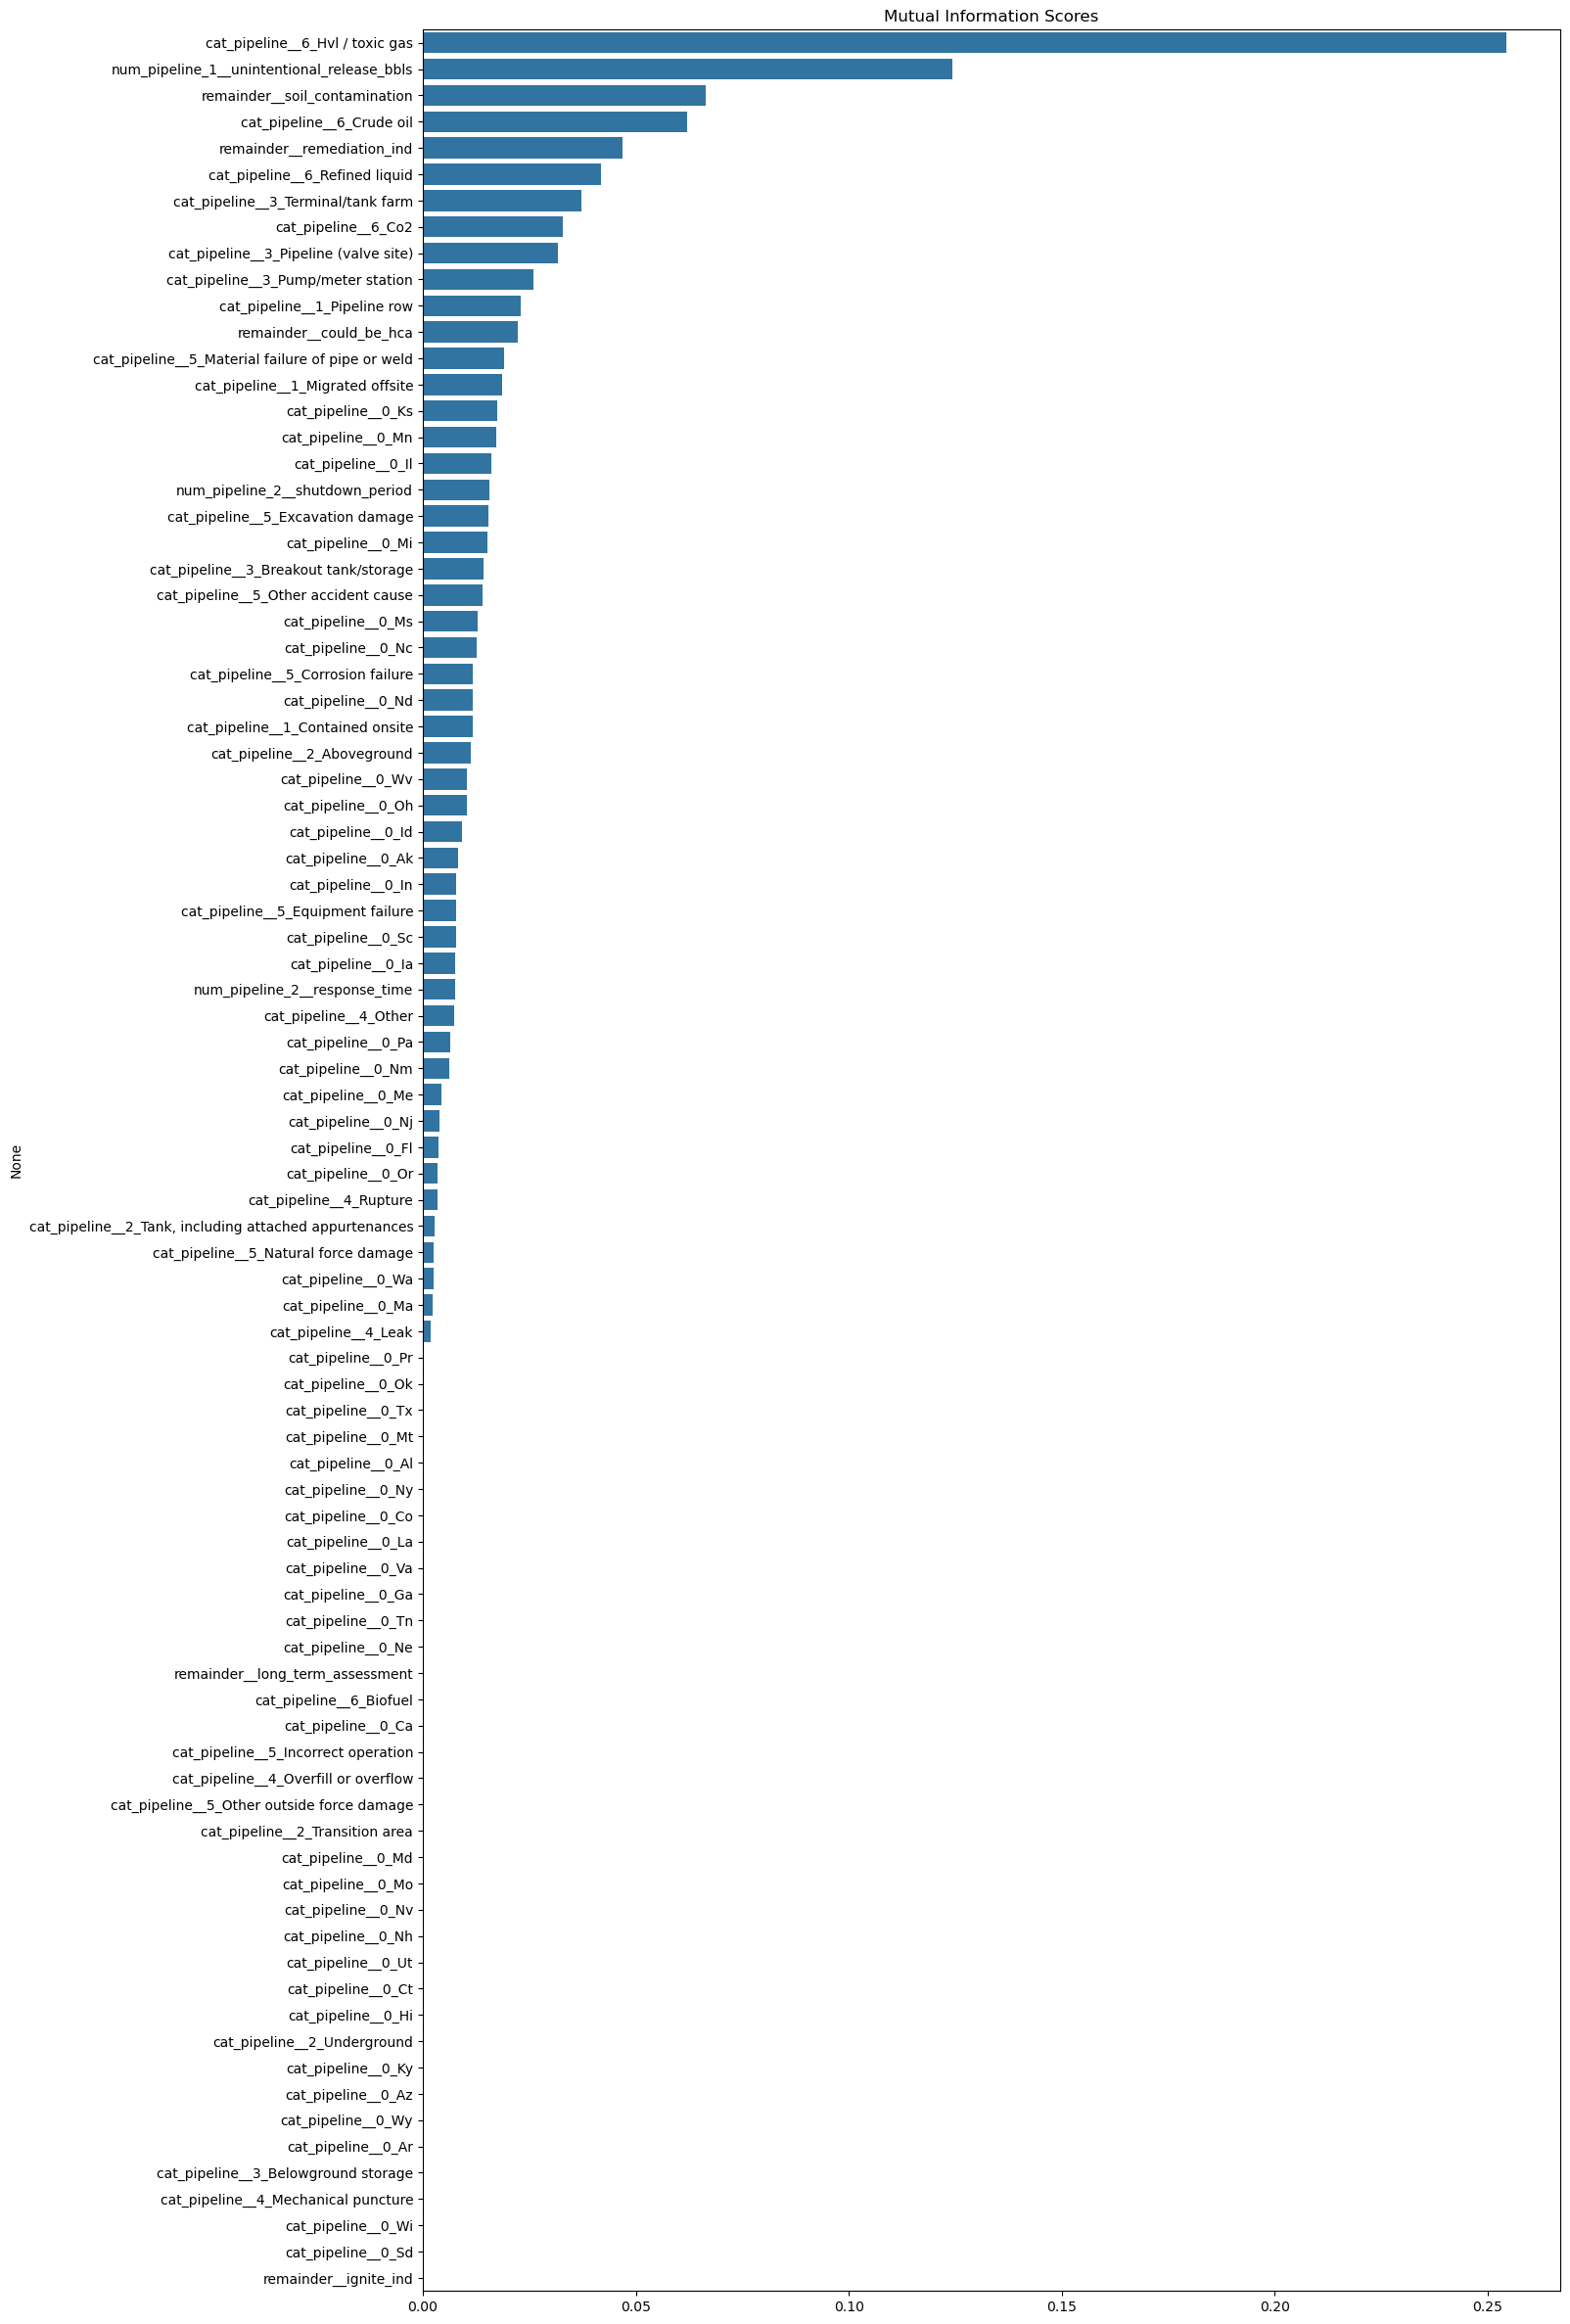

In [31]:
fig, ax = plt.subplots(figsize=(15,30))
sns.barplot(x=mi_series.values, y=mi_series.index, ax=ax)
plt.title("Mutual Information Scores")

plt.show()

In [32]:
X_train.head()

,local_datetime,onshore_state_abbreviation,location_type,incident_area_type,system_part_involved,could_be_hca,cause,commodity_released_type,unintentional_release_bbls,release_type,ignite_ind,shutdown_datetime,restart_datetime,soil_contamination,long_term_assessment,remediation_ind,on_site_datetime
report_number,,,,,,,,,,,,,,,,,
20150285,2015-07-15 08:09:00,Nm,Contained onsite,Aboveground,Pump/meter station,No,Equipment failure,Crude oil,1.43,Leak,No,7/15/2015 8:09,7/15/2015 10:20,Yes,No,Yes,2015-07-15 09:00:00
20150355,2015-09-08 16:06:00,Mo,Migrated offsite,Transition area,Pipeline (valve site),No,Other outside force damage,Refined liquid,5.00,Mechanical puncture,No,9/8/15 16:06,9/10/15 10:39,Yes,No,No,2015-09-08 16:13:00
20110418,2011-10-13 12:00:00,Tx,Contained onsite,Aboveground,Pump/meter station,No,Equipment failure,Crude oil,0.12,Leak,No,NaN,NaN,NaN,NaN,NaN,2011-10-13 12:00:00
20210102,2021-02-28 16:00:00,Il,Contained onsite,"Tank, including attached appurtenances",Breakout tank/storage,Yes,Natural force damage,Crude oil,10.00,Leak,No,2/28/2021 18:45,3/9/21 18:00,No,No,No,2021-02-28 18:45:00
20170082,2017-02-04 14:37:00,Nm,Pipeline row,Aboveground,Pipeline (valve site),Yes,Equipment failure,Hvl / toxic gas,0.10,Leak,No,NaN,NaN,No,No,No,2017-02-04 15:20:00


In [33]:
y_mean = [y_train.mean()] * len(y_train)
baseline = mean_absolute_error(y_mean, y_train)
print("mea: ", baseline)

mea:  0.5880494009764159


#### **Random Forest**

In [34]:
forest_pipeline = Pipeline([
    ('binary_impute', binary_imputer),
    ('cleaning', FunctionTransformer(clean_data, validate=False)),
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=0))

])

score = cross_val_score(forest_pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
mea_scores = -score

print('scores: ', mea_scores)
print('mean score: ', mea_scores.mean())


scores:  [0.28761459 0.28874425 0.2863815  0.30402697 0.29007727]
mean score:  0.2913689176924778


In [35]:
forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('binary_impute',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary_imp',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['soil_contamination',
                                                   'long_term_assessment',
                                                   'remediation_ind'])])),
                ('cleaning',
                 FunctionTransformer(func=<function clean_data at 0x00000238AE42E660>)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   t...
                                                                   SimpleImputer()),
                                                                  ('power-transform',
                                                                   PowerTransformer(method='box-cox')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['unintentional_release_bbls']),
                                                 ('num_pipeline_2',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('power-transform',
                                                                   PowerTransformer()),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['response_time',
                                                   'shutdown_period'])])),
                ('model', RandomForestRegressor(random_state=0))])

In [36]:
y_pred = np.sin(forest_pipeline.predict(X_test))**2

print("mae: ", mean_absolute_error(np.sin(y_test)**2, y_pred))
print("mse: ", mean_squared_error(np.sin(y_test)**2, y_pred))
print("rmse: ", root_mean_squared_error(np.sin(y_test)**2, y_pred))
print("median_error: ", median_absolute_error(np.sin(y_test)**2, y_pred))

mae:  0.17028831513845807
mse:  0.10566799919888524
rmse:  0.325066145882473
median_error:  0.031487538060326115


0.16558021202276982


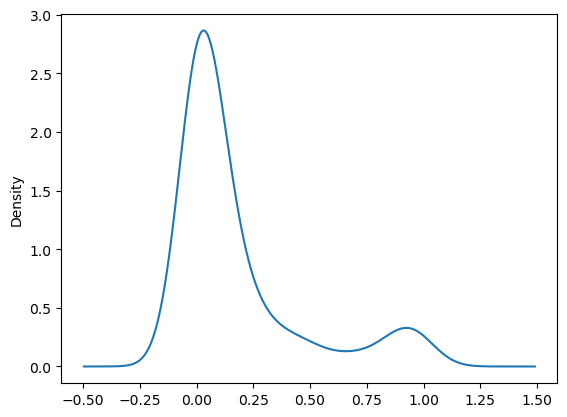

In [37]:
abs_errors = np.abs(np.sin(y_test)**2 - y_pred)
abs_errors.plot(kind='kde')
p90 = np.percentile(abs_errors, 75)
print(p90)

In [38]:
pd.DataFrame({'released': X_test['unintentional_release_bbls'],
              'recovery': (np.sin(y_test.values)**2) * 100,
              'prediction': y_pred * 100}).head(25)

,released,recovery,prediction
report_number,,,
20140377,1.43,0.000000,34.549150
20130384,0.23,100.000000,98.762081
20170434,4.00,100.000000,98.328475
20120095,2.00,0.000000,92.740216
20150081,0.01,100.000000,92.669804
20160293,50.24,100.000000,99.741621
20110382,0.17,0.000000,0.650683
20160089,223.00,0.000000,0.000000
20130249,1.83,100.000000,89.022489


In [39]:
depths = [tree.tree_.max_depth for tree in forest_pipeline[-1].estimators_]

print("Depths of individual trees:", depths)
print("Average depth:", sum(depths) / len(depths))
print("Max depth among trees:", max(depths))

Depths of individual trees: [38, 33, 37, 35, 44, 38, 34, 39, 34, 35, 30, 39, 33, 31, 34, 36, 30, 35, 36, 36, 46, 35, 33, 36, 36, 37, 38, 39, 39, 35, 33, 32, 37, 31, 41, 43, 29, 32, 32, 31, 38, 36, 29, 34, 35, 34, 33, 33, 34, 36, 38, 42, 35, 40, 33, 34, 36, 35, 41, 31, 35, 35, 33, 27, 34, 34, 42, 34, 32, 39, 38, 33, 34, 34, 30, 34, 39, 33, 40, 35, 31, 36, 38, 36, 33, 36, 36, 38, 32, 46, 38, 41, 34, 35, 37, 31, 42, 39, 35, 33]
Average depth: 35.51
Max depth among trees: 46


#### **XGBoost**

In [40]:
xgb_pipeline = Pipeline([
    ('binary_impute', binary_imputer),
    ('cleaning', FunctionTransformer(clean_data, validate=False)),
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=0))
])

score = cross_val_score(xgb_pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
mea_scores = -score

print('scores: ', mea_scores)
print('mean score: ', mea_scores.mean())

scores:  [0.31395677 0.30918167 0.30550549 0.32590175 0.31007295]
mean score:  0.312923725258368


In [41]:
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('binary_impute',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary_imp',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['soil_contamination',
                                                   'long_term_assessment',
                                                   'remediation_ind'])])),
                ('cleaning',
                 FunctionTransformer(func=<function clean_data at 0x00000238AE42E660>)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   t...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=0, ...))])

In [42]:
y_pred = np.sin(xgb_pipeline.predict(X_test))**2

print("mae: ", mean_absolute_error(np.sin(y_test)**2, y_pred))
print("rmse: ", root_mean_squared_error(np.sin(y_test)**2, y_pred))
print("mse: ", mean_squared_error(np.sin(y_test)**2, y_pred))
print("median_error: ", median_absolute_error(np.sin(y_test)**2, y_pred))

mae:  0.1753215337779511
rmse:  0.3237040039582084
mse:  0.10478428217857581
median_error:  0.04844429902732372


In [43]:
pd.DataFrame({'recovery': (np.sin(y_test.values)**2) * 100,
              'prediction': y_pred * 100}).head(25)

,recovery,prediction
0,0.000000,12.002517
1,100.000000,99.913734
2,100.000000,96.862282
3,0.000000,91.295250
4,100.000000,97.291031
5,100.000000,99.439278
6,0.000000,0.006516
7,0.000000,5.914355
8,100.000000,99.270157
9,100.000000,99.498817


In [44]:
booster = xgb_pipeline[-1].get_booster()

# Convert the booster into a DataFrame of trees
df = booster.trees_to_dataframe()

tree_depths = df.groupby('Tree')['Node'].max()
print("Individual tree depths:", tree_depths.values)
print("Average depth:", tree_depths.mean())
print("Max depth:", tree_depths.max())

Individual tree depths: [ 56  60  62  58  66  64  94  90  98  70  72  70  66  72  86  88  80  96
  80  52  28  64  94  68  66 102  34  76  80  90  86  70  28  80  36 102
  32  90  78  86  34  72 102  74  20  70  46  46  58  32  62  92  46  58
  52  84  98  90  90  90  90  40  84  68  66  62 106 116  98 110  66  54
  36 102  96  86  96  48  78  40  52 104  82  78 108  80  84 114  38  58
  74 100  78  52  96  62  64  54  52  86]
Average depth: 72.44
Max depth: 116


#### **Linear Model - Linear Regression**

In [45]:
ln_pipeline = Pipeline([
    ('binary_impute', binary_imputer),
    ('cleaning', FunctionTransformer(clean_data, validate=False)),
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

ln_pipeline.fit(X_train, y_train)

Pipeline(steps=[('binary_impute',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary_imp',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['soil_contamination',
                                                   'long_term_assessment',
                                                   'remediation_ind'])])),
                ('cleaning',
                 FunctionTransformer(func=<function clean_data at 0x00000238AE42E660>)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   t...
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('power-transform',
                                                                   PowerTransformer(method='box-cox')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['unintentional_release_bbls']),
                                                 ('num_pipeline_2',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('power-transform',
                                                                   PowerTransformer()),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['response_time',
                                                   'shutdown_period'])])),
                ('model', LinearRegression())])

In [46]:
y_pred = np.sin(ln_pipeline.predict(X_test))**2

print("mae: ", mean_absolute_error(np.sin(y_test)**2, y_pred))
print("rmse: ", root_mean_squared_error(np.sin(y_test)**2, y_pred))
print("mse: ", mean_squared_error(np.sin(y_test)**2, y_pred))
print("median_error: ", median_absolute_error(np.sin(y_test)**2, y_pred))

mae:  0.17217617253714407
rmse:  0.3314502745520596
mse:  0.1098592845006357
median_error:  0.05053021866304519


#### **Linear Model - BayesianRidge**

In [47]:
br_pipeline = Pipeline([
    ('binary_impute', binary_imputer),
    ('cleaning', FunctionTransformer(clean_data, validate=False)),
    ('preprocessor', preprocessor),
    ('model', BayesianRidge())
])

br_pipeline.fit(X_train, y_train)

Pipeline(steps=[('binary_impute',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary_imp',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['soil_contamination',
                                                   'long_term_assessment',
                                                   'remediation_ind'])])),
                ('cleaning',
                 FunctionTransformer(func=<function clean_data at 0x00000238AE42E660>)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   t...
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('power-transform',
                                                                   PowerTransformer(method='box-cox')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['unintentional_release_bbls']),
                                                 ('num_pipeline_2',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('power-transform',
                                                                   PowerTransformer()),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['response_time',
                                                   'shutdown_period'])])),
                ('model', BayesianRidge())])

In [48]:
y_pred = np.sin(br_pipeline.predict(X_test))**2
print("mae: ", mean_absolute_error(np.sin(y_test)**2, y_pred))
print("rmse: ", root_mean_squared_error(np.sin(y_test)**2, y_pred))

mae:  0.17199168391522238
rmse:  0.3308735285427947


#### **SVR**

In [49]:
sv_pipeline = Pipeline([
    ('binary_impute', binary_imputer),
    ('cleaning', FunctionTransformer(clean_data, validate=False)),
    ('preprocessor', preprocessor),
    ('model', SVR())
])

sv_pipeline.fit(X_train, y_train)

Pipeline(steps=[('binary_impute',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary_imp',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['soil_contamination',
                                                   'long_term_assessment',
                                                   'remediation_ind'])])),
                ('cleaning',
                 FunctionTransformer(func=<function clean_data at 0x00000238AE42E660>)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   t...
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('power-transform',
                                                                   PowerTransformer(method='box-cox')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['unintentional_release_bbls']),
                                                 ('num_pipeline_2',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('power-transform',
                                                                   PowerTransformer()),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['response_time',
                                                   'shutdown_period'])])),
                ('model', SVR())])

In [50]:
y_pred = np.sin(sv_pipeline.predict(X_test))**2

print("mae: ", mean_absolute_error(np.sin(y_test)**2, y_pred))
print("rmse: ", root_mean_squared_error(np.sin(y_test)**2, y_pred))
print("mse: ", mean_squared_error(np.sin(y_test)**2, y_pred))
print("median_error: ", median_absolute_error(np.sin(y_test)**2, y_pred))

mae:  0.15789503493263812
rmse:  0.3456657253859372
mse:  0.11948479370658616
median_error:  0.013314887346458026


In [51]:
y_pred_t = np.sin(sv_pipeline.predict(X_train))**2

print("mae: ", mean_absolute_error(np.sin(y_train)**2, y_pred_t))
print("rmse: ", root_mean_squared_error(np.sin(y_train)**2, y_pred_t))
print("mse: ", mean_squared_error(np.sin(y_train)**2, y_pred_t))
print("median_error: ", median_absolute_error(np.sin(y_train)**2, y_pred_t))

mae:  0.11740470145732315
rmse:  0.2888479775527696
mse:  0.08343315413632528
median_error:  0.009930563384242449


<Axes: ylabel='Density'>

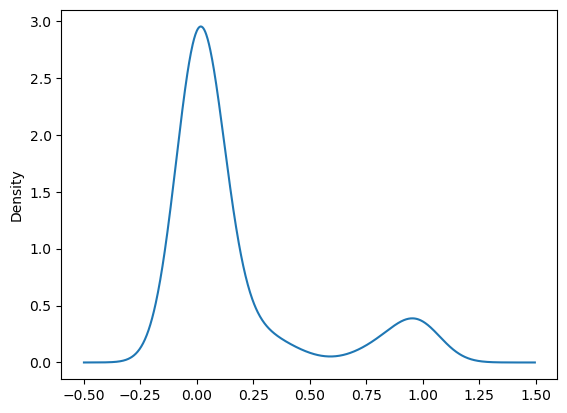

In [52]:
abs_errors = np.abs(np.sin(y_test)**2 - y_pred)
abs_errors.plot(kind='kde')


<Axes: ylabel='Density'>

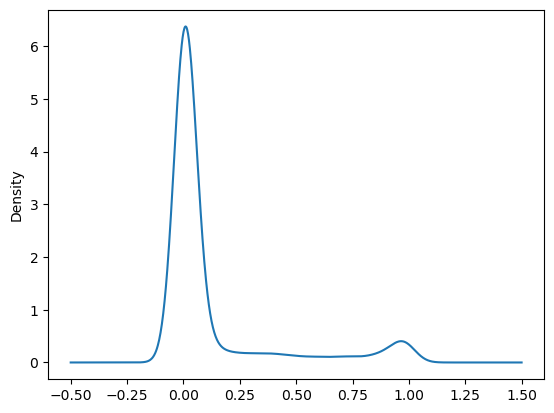

In [53]:
abs_errors_a = np.abs(np.sin(y_train)**2 - y_pred_t)
abs_errors_a.plot(kind='kde')

In [54]:
pd.DataFrame({'released': X_test['unintentional_release_bbls'],
              'recovery': (np.sin(y_test.values)**2) * 100,
              'prediction': y_pred * 100}).head(25)

,released,recovery,prediction
report_number,,,
20140377,1.43,0.000000,2.688129
20130384,0.23,100.000000,99.809646
20170434,4.00,100.000000,98.904963
20120095,2.00,0.000000,98.787188
20150081,0.01,100.000000,98.411540
20160293,50.24,100.000000,99.948167
20110382,0.17,0.000000,3.788308
20160089,223.00,0.000000,1.193667
20130249,1.83,100.000000,97.879520


#### **Hyperparameter tuning**

In [55]:
params = {
    "model__n_estimators": [75,100,125,150],
    "model__max_depth": [30,35,40,45]
}

forest_grid = GridSearchCV(
    estimator=forest_pipeline,
    param_grid=params,
    cv=5,
    scoring='neg_mean_absolute_error'
)
forest_grid.fit(X_train, y_train)


KeyboardInterrupt



In [ ]:
pd.DataFrame(forest_grid.cv_results_).sort_values(['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,16.045338,2.182650,0.824720,0.042470,30,150,"{'model__max_depth': 30, 'model__n_estimators'...",-0.282937,-0.293665,-0.291125,-0.305893,-0.290784,-0.292881,0.007434,1
2,13.322483,1.094685,0.834088,0.119951,30,125,"{'model__max_depth': 30, 'model__n_estimators'...",-0.282802,-0.293828,-0.292077,-0.305270,-0.290683,-0.292932,0.007231,2
1,11.598772,1.127179,0.814071,0.125277,30,100,"{'model__max_depth': 30, 'model__n_estimators'...",-0.282541,-0.294373,-0.291689,-0.306056,-0.290816,-0.293095,0.007592,3
15,19.050574,2.550280,1.024208,0.175440,45,150,"{'model__max_depth': 45, 'model__n_estimators'...",-0.284038,-0.293148,-0.291063,-0.307100,-0.290272,-0.293124,0.007619,4
7,15.369203,1.462148,0.896712,0.167766,35,150,"{'model__max_depth': 35, 'model__n_estimators'...",-0.283604,-0.293243,-0.291233,-0.307310,-0.290264,-0.293131,0.007793,5
14,14.461821,2.023918,0.889545,0.083899,45,125,"{'model__max_depth': 45, 'model__n_estimators'...",-0.283735,-0.293185,-0.292270,-0.305953,-0.290546,-0.293138,0.007213,6
11,15.870218,1.479511,0.943281,0.242293,40,150,"{'model__max_depth': 40, 'model__n_estimators'...",-0.284110,-0.293248,-0.291042,-0.307050,-0.290319,-0.293154,0.007581,7
10,14.309020,1.566902,1.005029,0.280573,40,125,"{'model__max_depth': 40, 'model__n_estimators'...",-0.283854,-0.293305,-0.292229,-0.305893,-0.290611,-0.293178,0.007157,8
6,13.098461,0.868891,0.860526,0.151078,35,125,"{'model__max_depth': 35, 'model__n_estimators'...",-0.283322,-0.293550,-0.292582,-0.306192,-0.290388,-0.293207,0.007413,9
0,9.377627,1.433697,0.738024,0.048208,30,75,"{'model__max_depth': 30, 'model__n_estimators'...",-0.282553,-0.295527,-0.293098,-0.305012,-0.290215,-0.293281,0.007310,10


In [ ]:
params = {
    "model__n_estimators": [200,250,300],
    "model__learning_rate": [0.01,0.05,0.1]
}

xgb_grid = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=params,
    cv=5,
    scoring='neg_mean_absolute_error'
)
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('binary_impute',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('binary_imp',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         ['soil_contamination',
                                                                          'long_term_assessment',
                                                                          'remediation_ind'])])),
                                       ('cleaning',
                                        FunctionTransformer(func=<function clean_data at 0x000002456E08BE20>)),
                                       ('preprocessor',
                                        ColumnTransform...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=0, ...))]),
             param_grid={'model__learning_rate': [0.01, 0.05, 0.1],
                         'model__n_estimators': [200, 250, 300]},
             scoring='neg_mean_absolute_error')

In [ ]:
pd.DataFrame(xgb_grid.cv_results_).sort_values('mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,5.221484,0.884920,0.947048,0.205168,0.05,200,"{'model__learning_rate': 0.05, 'model__n_estim...",-0.290814,-0.296902,-0.298388,-0.311387,-0.297015,-0.298901,0.006769,1
4,3.986708,0.199483,0.727641,0.059077,0.05,250,"{'model__learning_rate': 0.05, 'model__n_estim...",-0.291851,-0.296486,-0.299012,-0.310876,-0.297759,-0.299197,0.006322,2
5,5.884521,0.977882,0.966340,0.294134,0.05,300,"{'model__learning_rate': 0.05, 'model__n_estim...",-0.293492,-0.296623,-0.298878,-0.311668,-0.299235,-0.299979,0.006192,3
6,3.673333,0.073756,0.691061,0.045095,0.10,200,"{'model__learning_rate': 0.1, 'model__n_estima...",-0.299140,-0.299569,-0.305382,-0.312711,-0.301264,-0.303613,0.005055,4
7,5.974218,0.663628,0.997803,0.311030,0.10,250,"{'model__learning_rate': 0.1, 'model__n_estima...",-0.300715,-0.301472,-0.307903,-0.316206,-0.304784,-0.306216,0.005612,5
8,4.274040,0.347953,0.692892,0.064353,0.10,300,"{'model__learning_rate': 0.1, 'model__n_estima...",-0.303478,-0.303710,-0.309738,-0.318270,-0.307548,-0.308549,0.005404,6
2,4.593843,0.712902,0.784731,0.096289,0.01,300,"{'model__learning_rate': 0.01, 'model__n_estim...",-0.304773,-0.316912,-0.313123,-0.323987,-0.308439,-0.313447,0.006686,7
1,4.969782,1.048990,0.788410,0.184973,0.01,250,"{'model__learning_rate': 0.01, 'model__n_estim...",-0.314442,-0.326491,-0.322508,-0.332976,-0.318164,-0.322916,0.006458,8
0,4.540777,0.503144,0.734755,0.076116,0.01,200,"{'model__learning_rate': 0.01, 'model__n_estim...",-0.330373,-0.341787,-0.339287,-0.347670,-0.333944,-0.338613,0.006037,9


#### **Top picks - Forest model, XGBoost model, SVR model**

In [56]:
forest_model = Pipeline([
    ('binary_impute', binary_imputer),
    ('cleaning', FunctionTransformer(clean_data, validate=False)),
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=0, 
                                    n_estimators=150,
                                    max_depth=30))
])
forest_model.fit(X_train, y_train)


xgb_model = Pipeline([
    ('binary_impute', binary_imputer),
    ('cleaning', FunctionTransformer(clean_data, validate=False)),
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=0, 
                           n_estimators=200, 
                           learning_rate=0.05))
])
xgb_model.fit(X_train, y_train)


sv_model = Pipeline([
    ('binary_impute', binary_imputer),
    ('cleaning', FunctionTransformer(clean_data, validate=False)),
    ('preprocessor', preprocessor),
    ('model', SVR())
])
sv_model.fit(X_train, y_train)

Pipeline(steps=[('binary_impute',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary_imp',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['soil_contamination',
                                                   'long_term_assessment',
                                                   'remediation_ind'])])),
                ('cleaning',
                 FunctionTransformer(func=<function clean_data at 0x00000238AE42E660>)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   t...
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('power-transform',
                                                                   PowerTransformer(method='box-cox')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['unintentional_release_bbls']),
                                                 ('num_pipeline_2',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('power-transform',
                                                                   PowerTransformer()),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['response_time',
                                                   'shutdown_period'])])),
                ('model', SVR())])

In [57]:
forest_pred = np.sin(forest_model.predict(X_test))**2

print("mae: ", mean_absolute_error(np.sin(y_test)**2, forest_pred))
print("rmse: ", root_mean_squared_error(np.sin(y_test)**2, forest_pred))
print("mse: ", mean_squared_error(np.sin(y_test)**2, forest_pred))
print("median: ", median_absolute_error(np.sin(y_test)**2, forest_pred))

mae:  0.16975369497558954
rmse:  0.3231022796486757
mse:  0.10439508311417103
median:  0.037914723222088054


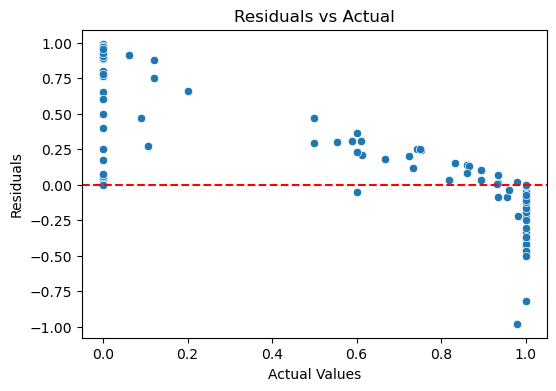

In [58]:
resids = forest_pred - np.sin(y_test)**2
plt.figure(figsize=(6,4))
sns.scatterplot(x=np.sin(y_test)**2, y=resids)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Actual")
plt.show()

In [59]:
xgb_pred = np.sin(xgb_model.predict(X_test))**2

print("mae: ", mean_absolute_error(np.sin(y_test)**2, xgb_pred))
print("rmse: ", root_mean_squared_error(np.sin(y_test)**2, xgb_pred))
print("mse: ", mean_squared_error(np.sin(y_test)**2, xgb_pred))
print("median: ", median_absolute_error(np.sin(y_test)**2, xgb_pred))

mae:  0.17068631631492853
rmse:  0.32742892184096056
mse:  0.10720969885793386
median:  0.037337660789489746


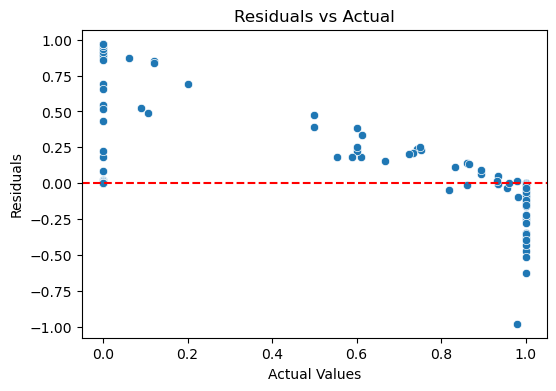

In [60]:
resids = xgb_pred - np.sin(y_test)**2
plt.figure(figsize=(6,4))
sns.scatterplot(x=np.sin(y_test)**2, y=resids)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Actual")
plt.show()

In [61]:
sv_pred = np.sin(sv_model.predict(X_test))**2

print("mae: ", mean_absolute_error(np.sin(y_test)**2, sv_pred))
print("rmse: ", root_mean_squared_error(np.sin(y_test)**2, sv_pred))
print("mse: ", mean_squared_error(np.sin(y_test)**2, sv_pred))
print("median: ", median_absolute_error(np.sin(y_test)**2, sv_pred))

mae:  0.15789503493263812
rmse:  0.3456657253859372
mse:  0.11948479370658616
median:  0.013314887346458026


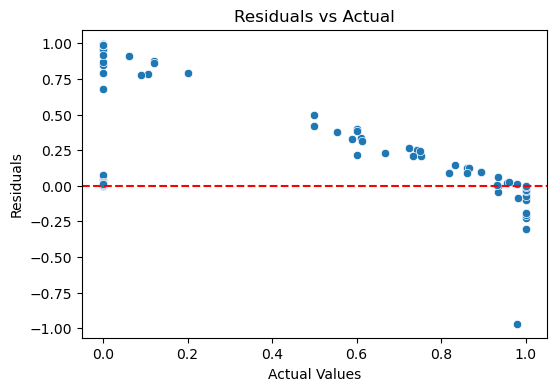

In [62]:
resids = sv_pred - np.sin(y_test)**2
plt.figure(figsize=(6,4))
sns.scatterplot(x=np.sin(y_test)**2, y=resids)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Actual")
plt.show()

In [63]:
sv_frame = pd.DataFrame({'released': X_test['unintentional_release_bbls'],
              'recovery': (np.sin(y_test.values)**2) * 100,
              'prediction': sv_pred * 100})
sv_frame['residuals'] = (sv_frame['recovery'] - sv_frame['prediction'])

<Axes: ylabel='Density'>

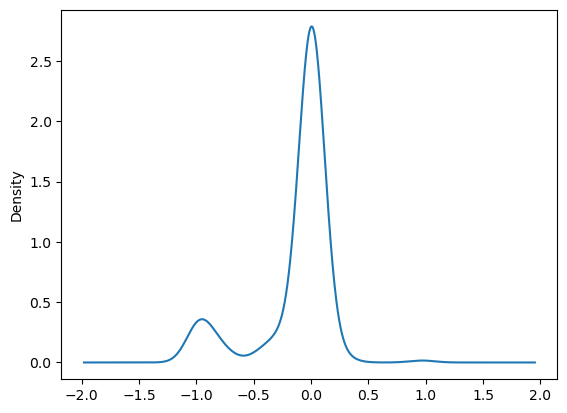

In [64]:
sv_abs_errors = (np.sin(y_test)**2 - sv_pred)
sv_abs_errors.plot(kind='kde')

In [65]:
with open('my_sv_model.pkl','wb') as f:
    pickle.dump(sv_model, f)

In [66]:
sv_model

Pipeline(steps=[('binary_impute',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary_imp',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['soil_contamination',
                                                   'long_term_assessment',
                                                   'remediation_ind'])])),
                ('cleaning',
                 FunctionTransformer(func=<function clean_data at 0x00000238AE42E660>)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   t...
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('power-transform',
                                                                   PowerTransformer(method='box-cox')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['unintentional_release_bbls']),
                                                 ('num_pipeline_2',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('power-transform',
                                                                   PowerTransformer()),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['response_time',
                                                   'shutdown_period'])])),
                ('model', SVR())])